In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
zip_path = "/content/drive/MyDrive/final_dataset_v2.zip"
extract_to = "/content/final_dataset"


In [ ]:
import zipfile
import os

os.makedirs(extract_to, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("🔥 Unzipped successfully into:", extract_to)


🔥 Unzipped successfully into: /content/final_dataset


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# =========================
# 📁 Paths
# =========================
train_dir = "/content/final_dataset/train"
val_dir   = "/content/final_dataset/val"
test_dir  = "/content/final_dataset/test"

# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

save_dir = "/content/drive/MyDrive/custom_cnn_real_vs_fake"
os.makedirs(save_dir, exist_ok=True)

# =========================
# ⚙️ Parameters
# =========================
IMG_SIZE = (256, 256)
BATCH_SIZE = 32
EPOCHS = 15

# =========================
# 🔄 Data Augmentation & Normalization
# =========================
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

# =========================
# 📦 Load Datasets
# =========================
train_ds = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_ds = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_ds = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# =========================
# 🧩 Custom CNN Model
# =========================
def build_custom_cnn(input_shape=(256, 256, 3)):
    model = models.Sequential([
        layers.Input(shape=input_shape),

        layers.Conv2D(32, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2,2),

        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2,2),

        layers.Conv2D(128, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2,2),

        layers.Conv2D(256, (3,3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2,2),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

model = build_custom_cnn()

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# =========================
# 🧠 Training Callbacks
# =========================
checkpoint_best = tf.keras.callbacks.ModelCheckpoint(
    os.path.join(save_dir, "custom_cnn_best.keras"),
    save_best_only=True,
    monitor="val_accuracy",
    mode="max",
    verbose=1
)

checkpoint_last = tf.keras.callbacks.ModelCheckpoint(
    os.path.join(save_dir, "custom_cnn_last.keras"),
    save_weights_only=False,
    verbose=1
)

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.3, patience=3, verbose=1),
    checkpoint_best,
    checkpoint_last
]

# =========================
# 🚀 Train
# =========================
try:
    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=EPOCHS,
        callbacks=callbacks
    )
except KeyboardInterrupt:
    print("\n🛑 Training interrupted — saving model...")
    model.save(os.path.join(save_dir, "custom_cnn_interrupted.keras"))

# =========================
# ✅ Evaluate on Test Set
# =========================
test_loss, test_acc = model.evaluate(test_ds)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")

# =========================
# 💾 Save Final Model
# =========================
final_path = os.path.join(save_dir, "custom_cnn_final.keras")
model.save(final_path)
print(f"☁️ Final model saved at: {final_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 20936 images belonging to 2 classes.
Found 4499 images belonging to 2 classes.
Found 4499 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step - accuracy: 0.7084 - loss: 0.7732
Epoch 1: val_accuracy improved from -inf to 0.78040, saving model to /content/drive/MyDrive/custom_cnn_real_vs_fake/custom_cnn_best.keras

Epoch 1: saving model to /content/drive/MyDrive/custom_cnn_real_vs_fake/custom_cnn_last.keras
655/655 ━━━━━━━━━━━━━━━━━━━━ 371s 548ms/step - accuracy: 0.7085 - loss: 0.7730 - val_accuracy: 0.7804 - val_loss: 0.4951 - learning_rate: 1.0000e-04
Epoch 2/15
655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 503ms/step - accuracy: 0.7602 - loss: 0.5144
Epoch 2: val_accuracy improved from 0.78040 to 0.78151, saving model to /content/drive/MyDrive/custom_cnn_real_vs_fake/custom_cnn_best.keras

Epoch 2: saving model to /content/drive/MyDrive/custom_cnn_real_vs_fake/custom_cnn_last.keras
655/655 ━━━━━━━━━━━━━━━━━━━━ 339s 518ms/step - accuracy: 0.7602 - loss: 0.5143 - val_accuracy: 0.7815 - val_loss: 0.4733 - learning_rate: 1.0000e-04
Epoch 3/15
655/655 ━━━━━━━━━━━━━━━━━━━━ 0s 511ms/step - a

✅ Model loaded successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step


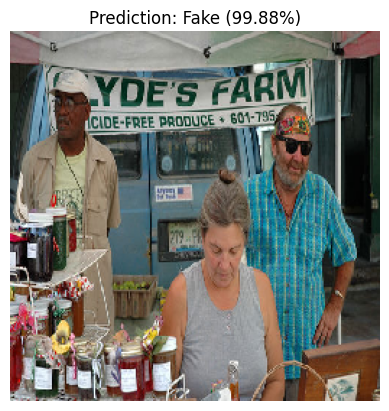

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os

# =========================
# 1️⃣ Paths
# =========================
model_path = "/content/drive/MyDrive/custom_cnn_real_vs_fake/custom_cnn_final.keras"
img_path   = "/content/2.jpg"  # replace with your image path

# =========================
# 2️⃣ Load Model
# =========================
model = tf.keras.models.load_model(model_path)
print("✅ Model loaded successfully!")

# =========================
# 3️⃣ Load & Preprocess Image
# =========================
IMG_SIZE = (256, 256)  # must match training

img = image.load_img(img_path, target_size=IMG_SIZE)
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # rescale like training
img_array = np.expand_dims(img_array, axis=0)  # batch dimension

# =========================
# 4️⃣ Predict
# =========================
prediction = model.predict(img_array)[0][0]  # binary output
label = "Real" if prediction > 0.5 else "Fake"
confidence = prediction if prediction > 0.5 else 1 - prediction

# =========================
# 5️⃣ Show Result
# =========================
plt.imshow(img)
plt.axis("off")
plt.title(f"Prediction: {label} ({confidence*100:.2f}%)")
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import os

# =========================
# 📁 Paths
# =========================
train_dir = "/content/final_dataset/train"
val_dir   = "/content/final_dataset/val"
test_dir  = "/content/final_dataset/test"

# =========================
# ⚙️ Parameters
# =========================
IMG_SIZE = (256, 256)
BATCH_SIZE = 32
EPOCHS = 20
SEED = 42

# =========================
# 🔄 Data Augmentation
# =========================
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.15),
    layers.RandomZoom(0.2),
    layers.RandomBrightness(0.1),
    layers.RandomContrast(0.1)
], name="data_augmentation")

# =========================
# 📦 Load datasets
# =========================
train_ds = keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical",
    shuffle=True,
    seed=SEED
)

val_ds = keras.preprocessing.image_dataset_from_directory(
    val_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical",
    shuffle=False
)

test_ds = keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical",
    shuffle=False
)

# =========================
# 🔄 Prefetch for performance
# =========================
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds   = val_ds.prefetch(buffer_size=AUTOTUNE)
test_ds  = test_ds.prefetch(buffer_size=AUTOTUNE)

# =========================
# 🧩 Build model with EfficientNetB0 backbone
# =========================
base_model = keras.applications.EfficientNetB0(
    input_shape=IMG_SIZE + (3,),
    include_top=False,
    weights="imagenet"
)
base_model.trainable = False  # Freeze backbone initially

inputs = keras.Input(shape=IMG_SIZE + (3,))
x = data_augmentation(inputs)
x = keras.applications.efficientnet.preprocess_input(x)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(2, activation="softmax")(x)  # 2 classes: real/fake
model = keras.Model(inputs, outputs)

# =========================
# ⚙️ Compile model
# =========================
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    loss=keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
    metrics=["accuracy"]
)

# =========================
# 🛠️ Callbacks
# =========================
save_dir = "/content/drive/MyDrive/transfer_learning_model"
os.makedirs(save_dir, exist_ok=True)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath=os.path.join(save_dir, "best_model.keras"),
        monitor="val_accuracy",
        save_best_only=True,
        verbose=1
    ),
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=5,
        restore_best_weights=True
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_accuracy",
        factor=0.3,
        patience=3,
        verbose=1
    )
]

# =========================
# 🚀 Train Phase 1 — Frozen backbone
# =========================
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=callbacks
)

# =========================
# 🔓 Fine-tune Phase 2 — Unfreeze top layers
# =========================
base_model.trainable = True
for layer in base_model.layers[:-50]:  # Freeze all but last 50 layers
    layer.trainable = False

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-5),
    loss=keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
    metrics=["accuracy"]
)

fine_tune_history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,  # Fine-tune fewer epochs
    callbacks=callbacks
)

# =========================
# 🔥 Evaluate on Test Set
# =========================
test_loss, test_acc = model.evaluate(test_ds)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")

# =========================
# 💾 Save final model
# =========================
final_path = os.path.join(save_dir, "final_transfer_learning_model.keras")
model.save(final_path)
print(f"Model saved to Drive at: {final_path}")


Found 27912 files belonging to 2 classes.
Found 5998 files belonging to 2 classes.
Found 5998 files belonging to 2 classes.
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
873/873 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.6368 - loss: 0.6555
Epoch 1: val_accuracy improved from -inf to 0.79793, saving model to /content/drive/MyDrive/transfer_learning_model/best_model.keras
873/873 ━━━━━━━━━━━━━━━━━━━━ 121s 121ms/step - accuracy: 0.6369 - loss: 0.6554 - val_accuracy: 0.7979 - val_loss: 0.5024 - learning_rate: 1.0000e-04
Epoch 2/20
872/873 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.7813 - loss: 0.5146
Epoch 2: val_accuracy improved from 0.79793 to 0.82911, saving model to /content/drive/MyDrive/transfer_learning_model/best_model.keras
873/873 ━━━━━━━━━━━━━━━━━━━━ 105s 121ms/step - accuracy: 0.7813 - loss: 0.5146 - val_accuracy: 0.8291 - val_loss: 0.4667 - learning_rate: 1.0000e-04
Epoch 3/20
872/873 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.8037 - loss: 0.48

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
import numpy as np
import os

# =========================
# Paths
# =========================
model_path = "/content/drive/MyDrive/transfer_learning_model_Xception/best_model.keras"  # your best model
img_path   = "/content/6.png"  # replace with your image

# =========================
# Load Model
# =========================
model = keras.models.load_model(model_path)

# =========================
# Preprocess Image
# =========================
IMG_SIZE = (256, 256)

img = image.load_img(img_path, target_size=IMG_SIZE)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # make batch of 1
img_array = tf.keras.applications.efficientnet.preprocess_input(img_array)

# =========================
# Predict
# =========================
pred = model.predict(img_array)
class_index = np.argmax(pred, axis=1)[0]
confidence = pred[0][class_index] * 100

# =========================
# Map class index to label
# =========================
class_labels = {0: "fake", 1: "real"}  # make sure this matches your dataset
predicted_label = class_labels[class_index]

print(f"Prediction: {predicted_label} ({confidence:.2f}%)")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 923ms/step
Prediction: fake (98.35%)


In [4]:
# All-in-one: extract @2 FPS, preprocess correctly (256x256), predict, diagnostics
import os, cv2, numpy as np, tensorflow as tf
from tensorflow.keras.preprocessing import image
from glob import glob
import shutil

# ---------- CONFIG ----------
MODEL_PATH = "/content/drive/MyDrive/transfer_learning_model_Xception/best_model.keras"
VIDEO_PATH = "/content/4.mp4"   # your uploaded video
FRAMES_DIR = "/content/frames_extracted"
FPS_TO_EXTRACT = 2                 # 2 frames per second
IMG_SIZE = (256, 256)               # <-- MUST match training
THRESHOLD = 0.5                     # threshold used for binary decision (not final arbiter)
TOP_K_TO_SHOW = 6                   # show top K most-fake frames as diagnostics
# -----------------------------

# load model
model = tf.keras.models.load_model(MODEL_PATH)
print("✅ Model loaded:", MODEL_PATH)

# helper: extract frames at target FPS
def extract_frames(video_path, out_dir, fps_target=2):
    os.makedirs(out_dir, exist_ok=True)
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        raise RuntimeError("Cannot open video: " + video_path)
    src_fps = cap.get(cv2.CAP_PROP_FPS) or 25.0
    frame_interval = max(1, int(round(src_fps / fps_target)))
    frame_idx = 0
    saved = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        if (frame_idx % frame_interval) == 0:
            path = os.path.join(out_dir, f"frame_{saved:05d}.jpg")
            cv2.imwrite(path, frame)            # original BGR saved
            saved += 1
        frame_idx += 1
    cap.release()
    print(f"📸 Extracted {saved} frames at ~{fps_target} FPS (src_fps={src_fps:.2f})")
    return saved

# preprocess + predict one frame -> returns (prob_fake, prob_real)
def predict_frame_probs(img_path):
    # load -> resize -> convert to array
    img = image.load_img(img_path, target_size=IMG_SIZE)
    arr = image.img_to_array(img)             # float32
    # use EfficientNet preprocessing (matches training)
    arr = tf.keras.applications.efficientnet.preprocess_input(arr)
    arr = np.expand_dims(arr, axis=0)
    preds = model.predict(arr, verbose=0)[0]  # shape (2,) for softmax [p_fake, p_real]
    # defensively handle shapes
    if len(preds) == 1:
        # binary single-output sigmoid case (unlikely here)
        p_fake = preds[0]
        p_real = 1.0 - p_fake
    else:
        p_fake, p_real = float(preds[0]), float(preds[1])
    return p_fake, p_real

# run extraction
if os.path.exists(FRAMES_DIR):
    # optional: clear old frames to avoid confusion
    shutil.rmtree(FRAMES_DIR)
num = extract_frames(VIDEO_PATH, FRAMES_DIR, FPS_TO_EXTRACT)
if num == 0:
    raise RuntimeError("No frames extracted — check VIDEO_PATH or video FPS.")

# predict on all frames (batch in groups for speed)
frame_files = sorted(glob(os.path.join(FRAMES_DIR, "*.jpg")))
probs = []
for p in frame_files:
    p_fake, p_real = predict_frame_probs(p)
    probs.append((p, p_fake, p_real))

# stats & aggregation
p_fakes = np.array([x[1] for x in probs])
p_reals = np.array([x[2] for x in probs])

mean_fake = p_fakes.mean()
median_fake = np.median(p_fakes)
mean_real = p_reals.mean()
median_real = np.median(p_reals)

# majority vote by frame (>0.5 => fake)
votes = (p_fakes > 0.5).sum()
vote_frac_fake = votes / len(p_fakes)

print("\n=== Frame-level summary ===")
print("Frames evaluated:", len(p_fakes))
print(f"Mean P(fake): {mean_fake:.4f}   Mean P(real): {mean_real:.4f}")
print(f"Median P(fake): {median_fake:.4f}   Median P(real): {median_real:.4f}")
print(f"Fraction frames voted FAKE (>0.5): {vote_frac_fake:.3f} ({votes}/{len(p_fakes)})")

# decide final: combine metrics (you can pick strategy)
# Strategy: if mean_fake > 0.5 or vote_frac_fake > 0.5 or median_fake > 0.5 => FAKE, else REAL
is_fake_final = (mean_fake > 0.5) or (vote_frac_fake > 0.5) or (median_fake > 0.5)
final_label = "FAKE (AI-generated)" if is_fake_final else "REAL (Camera)"

print("\n===================================")
print("🎥 FINAL VIDEO CLASSIFICATION:", final_label)
print("===================================\n")

# Diagnostic: show top-K frames by P(fake)
sorted_by_fake = sorted(probs, key=lambda x: x[1], reverse=True)
print(f"Top {TOP_K_TO_SHOW} frames with highest P(fake):")
for i, (path, pf, pr) in enumerate(sorted_by_fake[:TOP_K_TO_SHOW]):
    print(f"{i+1:02d}. {os.path.basename(path)}  P(fake)={pf:.4f}  P(real)={pr:.4f}")

# Save per-frame CSV
import csv
csv_out = os.path.join(FRAMES_DIR, "frame_predictions.csv")
with open(csv_out, "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["frame", "p_fake", "p_real"])
    for (path, pf, pr) in probs:
        writer.writerow([os.path.basename(path), f"{pf:.6f}", f"{pr:.6f}"])
print("\nSaved per-frame predictions to:", csv_out)


✅ Model loaded: /content/drive/MyDrive/transfer_learning_model_Xception/best_model.keras
📸 Extracted 738 frames at ~5 FPS (src_fps=30.00)

=== Frame-level summary ===
Frames evaluated: 738
Mean P(fake): 0.5584   Mean P(real): 0.4416
Median P(fake): 0.5855   Median P(real): 0.4145
Fraction frames voted FAKE (>0.5): 0.589 (435/738)

🎥 FINAL VIDEO CLASSIFICATION: FAKE (AI-generated)

Top 6 frames with highest P(fake):
01. frame_00507.jpg  P(fake)=0.9894  P(real)=0.0106
02. frame_00515.jpg  P(fake)=0.9881  P(real)=0.0119
03. frame_00510.jpg  P(fake)=0.9864  P(real)=0.0136
04. frame_00511.jpg  P(fake)=0.9846  P(real)=0.0154
05. frame_00396.jpg  P(fake)=0.9766  P(real)=0.0234
06. frame_00514.jpg  P(fake)=0.9763  P(real)=0.0237

Saved per-frame predictions to: /content/frames_extracted/frame_predictions.csv


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import os

# =========================
# 📁 Paths
# =========================
train_dir = "/content/final_dataset/train"
val_dir   = "/content/final_dataset/val"
test_dir  = "/content/final_dataset/test"

# =========================
# ⚙️ Parameters
# =========================
IMG_SIZE = (256, 256)
BATCH_SIZE = 32
EPOCHS = 20
SEED = 42

# =========================
# 🔄 Data Augmentation
# =========================
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.15),
    layers.RandomZoom(0.2),
    layers.RandomBrightness(0.1),
    layers.RandomContrast(0.1)
], name="data_augmentation")

# =========================
# 📦 Load datasets
# =========================
train_ds = keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical",
    shuffle=True,
    seed=SEED
)

val_ds = keras.preprocessing.image_dataset_from_directory(
    val_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical",
    shuffle=False
)

test_ds = keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="categorical",
    shuffle=False
)

# =========================
# 🔄 Prefetch for performance
# =========================
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds   = val_ds.prefetch(buffer_size=AUTOTUNE)
test_ds  = test_ds.prefetch(buffer_size=AUTOTUNE)

# =========================
# 🧩 Build model with Xception backbone
# =========================
base_model = keras.applications.Xception(
    input_shape=IMG_SIZE + (3,),
    include_top=False,
    weights="imagenet"
)
base_model.trainable = False  # Freeze backbone initially

inputs = keras.Input(shape=IMG_SIZE + (3,))
x = data_augmentation(inputs)
x = keras.applications.xception.preprocess_input(x)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(2, activation="softmax")(x)  # 2 classes: real/fake
model = keras.Model(inputs, outputs)

# =========================
# ⚙️ Compile model
# =========================
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    loss=keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
    metrics=["accuracy"]
)

# =========================
# 🛠️ Callbacks
# =========================
save_dir = "/content/drive/MyDrive/transfer_learning_model_Xception"
os.makedirs(save_dir, exist_ok=True)

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath=os.path.join(save_dir, "best_model.keras"),
        monitor="val_accuracy",
        save_best_only=True,
        verbose=1
    ),
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=5,
        restore_best_weights=True
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_accuracy",
        factor=0.3,
        patience=3,
        verbose=1
    )
]

# =========================
# 🚀 Train Phase 1 — Frozen backbone
# =========================
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=callbacks
)

# =========================
# 🔓 Fine-tune Phase 2 — Unfreeze top layers
# =========================
base_model.trainable = True
for layer in base_model.layers[:-50]:  # Freeze all but last 50 layers
    layer.trainable = False

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-5),
    loss=keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
    metrics=["accuracy"]
)

fine_tune_history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,  # Fine-tune fewer epochs
    callbacks=callbacks
)

# =========================
# 🔥 Evaluate on Test Set
# =========================
test_loss, test_acc = model.evaluate(test_ds)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")

# =========================
# 💾 Save final model
# =========================
final_path = os.path.join(save_dir, "final_transfer_learning_model.keras")
model.save(final_path)
print(f"Model saved to Drive at: {final_path}")


Found 27912 files belonging to 2 classes.
Found 5998 files belonging to 2 classes.
Found 5998 files belonging to 2 classes.
Epoch 1/20
873/873 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step - accuracy: 0.6512 - loss: 0.6369
Epoch 1: val_accuracy improved from -inf to 0.76876, saving model to /content/drive/MyDrive/transfer_learning_model_Xception/best_model.keras
873/873 ━━━━━━━━━━━━━━━━━━━━ 223s 250ms/step - accuracy: 0.6513 - loss: 0.6369 - val_accuracy: 0.7688 - val_loss: 0.5370 - learning_rate: 1.0000e-04
Epoch 2/20
873/873 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step - accuracy: 0.7565 - loss: 0.5432
Epoch 2: val_accuracy improved from 0.76876 to 0.79193, saving model to /content/drive/MyDrive/transfer_learning_model_Xception/best_model.keras
873/873 ━━━━━━━━━━━━━━━━━━━━ 260s 248ms/step - accuracy: 0.7565 - loss: 0.5432 - val_accuracy: 0.7919 - val_loss: 0.5102 - learning_rate: 1.0000e-04
Epoch 3/20
873/873 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step - accuracy: 0.7806 - loss: 0.5159
Epoch 3: val_accuracy impro